In [42]:
import os
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
train_dir = r"D:\Dataset\S_B_R_images\train"
test_dir = r"D:\Dataset\S_B_R_images\test"

In [4]:
test_dir

'D:\\Dataset\\S_B_R_images\\test'

In [5]:
os.listdir(test_dir)

['bg', 'rt', 'sm']

In [28]:
def get_data(pt) :
    data = []
    for sf in os.listdir(pt) : 
        des = 0
        if sf == 'bg' : 
            des = 0
        elif sf == 'rt' : 
            des = 1
        else :
            des = 2
        path = os.path.join(pt,sf)
        for img in os.listdir(path) : 
            img_path = os.path.join(path,img)
            img_array = cv2.imread(img_path)
            img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
            img_array = cv2.resize(img_array,[150,150])
            data.append([img_array,des])
    return data

In [29]:
train_data = get_data(train_dir)
test_data = get_data(test_dir)

In [30]:
len(train_data),len(test_data)

(30, 9)

In [31]:
np.random.shuffle(train_data)
np.random.shuffle(test_data)

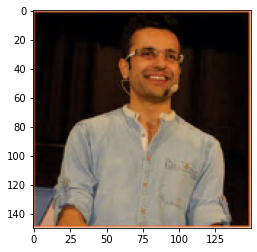

In [32]:
plt.imshow(train_data[0][0])

In [33]:
train_data[0][0].shape

(150, 150, 3)

In [34]:
X_train = []
Y_train = []
X_test = []
Y_test =[]
for pr in train_data : 
    X_train.append(pr[0])
    Y_train.append(pr[1])
    
    
for pr in test_data : 
    X_test.append(pr[0])
    Y_test.append(pr[1])

In [35]:
len(X_train),len(Y_train)

(30, 30)

In [36]:
len(X_test),len(Y_test)

(9, 9)

In [37]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [38]:
X_train.shape,Y_train.shape

((30, 150, 150, 3), (30,))

In [39]:
X_test.shape,Y_test.shape

((9, 150, 150, 3), (9,))

In [40]:
X_train = X_train / 255
X_test = X_test / 255

In [41]:
Y_train

array([2, 0, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 0, 0, 0, 2, 1, 0, 0])

In [43]:
model = Sequential()
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))


model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(Flatten())

model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(3,activation='softmax'))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [45]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [46]:
model.fit(X_train,Y_train,epochs=30,validation_data=(X_test,Y_test))

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 1.1179 - accuracy: 0.2667 - val_loss: 1.0771 - val_accuracy: 0.2222
Epoch 2/30
1/1 [==============================] - 1s 699ms/step - loss: 1.0645 - accuracy: 0.4667 - val_loss: 1.1201 - val_accuracy: 0.4444
Epoch 3/30
1/1 [==============================] - 1s 743ms/step - loss: 1.0576 - accuracy: 0.3667 - val_loss: 1.0459 - val_accuracy: 0.4444
Epoch 4/30
1/1 [==============================] - 1s 727ms/step - loss: 0.9429 - accuracy: 0.6000 - val_loss: 1.0281 - val_accuracy: 0.4444
Epoch 5/30
1/1 [==============================] - 1s 726ms/step - loss: 0.8738 - accuracy: 0.6333 - val_loss: 0.9703 - val_accuracy: 0.4444
Epoch 6/30
1/1 [==============================] - 1s 696ms/step - loss: 0.6989 - accuracy: 0.7667 - val_loss: 0.9173 - val_accuracy: 0.5556
Epoch 7/30
1/1 [==============================] - 1s 724ms/step - loss: 0.6232 - accuracy: 0.8667 - val_loss: 0.9349 - val_accuracy: 0.5556
Epoch 8/30
1/1 [=======

In [48]:
Y_pred = model.predict(X_test)

In [52]:
for tri in Y_pred : 
    print(np.argmax(tri),end=" ")

2 2 0 2 1 0 2 2 0 

In [50]:
Y_test

array([2, 0, 2, 1, 1, 0, 0, 2, 1])